# Building a brain object

Brain objects are superEEG's fundamental data structure for a single subject's iEEG data.  To create one at minimum you'll need a matrix of neural recordings (time samples by electrodes), electrode locations, and a sample rate. Additionally, you can include information about separate recording sessions and store custom meta data. In this tutorial, we'll build a brain object from scratch and get familiar with some of the methods.

# Load in the required libraries

In [1]:
import superEEG as se
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Library/Python/2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Simulate some data

First, we'll use superEEG's built in simulation functions to simulate some data and electrodes. By default, the `simualate_data` function will return a 1000 samples by 10 electrodes matrix, but you can specify the number of time samples with `n_samples` and the number of electrodes with `n_elecs`:

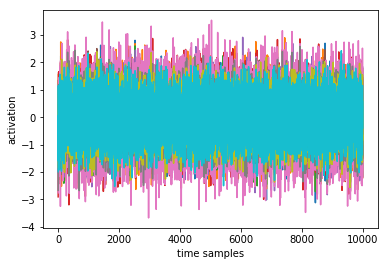

In [2]:
# simulate some data
data = se.simulate_bo(n_samples=10000, n_elecs=10).get_data()

# plot it
plt.plot(data)
plt.xlabel('time samples')
plt.ylabel('activation')
plt.show()

In [3]:
# # you can also specify a random seed and set the noise parameter to 0 
# # if you want to simulate the same brain object again

# data1 = se.simulate_bo(n_samples=10000, n_elecs=10, random_seed=True, noise=0).get_data()[0][0]
# data2 = se.simulate_bo(n_samples=10000, n_elecs=10, random_seed=True, noise=0).get_data()[0][0]

# print(data1)
# print(data2)

We'll also simulate some electrode locations

In [4]:
locs = se.simulate_locations()
print(locs)

    x   y   z
0  48   3 -44
1 -33 -16  -5
2   8 -50  30
3 -12  36  -8
4 -46  15 -47
5 -38  41 -46
6  40 -33  -6
7  22 -37  32
8 -14   8  15
9 -34 -37 -28


# Creating a brain object

To construct a new brain objects, simply pass the data and locations to the `Brain` class like this:

In [5]:
bo = se.Brain(data=data, locs=locs, sample_rate=1000)

To view a summary of the contents of the brain object, you can call the `info` function:

In [6]:
bo.info()

Number of electrodes: 10
Recording time in seconds: [10]
Number of sessions: 1
Date created: Tue Jan 30 19:04:01 2018
Meta data: None


Optionally, you can pass a `sessions` parameter, which is a numpy array the length of your data with a unique identifier for each session.  For example:

In [7]:
sessions = np.array([1]*(data.shape[0]/2)+[2]*(data.shape[0]/2))
bo = se.Brain(data=data, locs=locs, sample_rate=1000, sessions=sessions)
bo.info()

Number of electrodes: 10
Recording time in seconds: [5 5]
Number of sessions: 2
Date created: Tue Jan 30 19:04:01 2018
Meta data: None


You can also pass add custom meta data to the brain object to help keep track of its contents. `meta` is a dictionary comprised of whatever you want:

In [8]:
meta = {
    'subjectID' : '123',
    'Investigator' : 'Andy',
    'Hospital' : 'DHMC'
}
bo = se.Brain(data=data, locs=locs, sample_rate=1000, sessions=sessions, meta=meta)
bo.info()

Number of electrodes: 10
Recording time in seconds: [5 5]
Number of sessions: 2
Date created: Tue Jan 30 19:04:01 2018
Meta data: {'Hospital': 'DHMC', 'subjectID': '123', 'Investigator': 'Andy'}


# The structure of a brain object

Inside the brain object, the iEEG data is stored as a Pandas DataFrame that can be accessed directly:

In [9]:
bo.data.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.130853,-1.031255,-1.043967,-2.910129,-2.040846,-1.349104,-2.764116,-2.670279,-1.837794,-1.990564
1,0.144147,0.762900,0.400612,0.439818,0.294337,0.368699,0.173532,0.441089,0.233363,0.050556
2,-1.522037,0.198256,-1.200835,-1.218954,-0.644311,-0.837776,-1.332755,-0.620415,-0.751804,-1.591117
3,0.189972,0.399796,0.142781,-0.610405,-0.123945,0.014870,0.113567,0.056141,0.054892,-0.518781
4,-0.880810,-0.830537,-0.547377,-0.104575,0.066618,-0.494700,-0.614812,-0.109358,-0.160173,0.022744


or returned as a numpy array using the `get_data` method:

In [10]:
bo.get_data()

array([[-0.13085345, -1.03125472, -1.04396739, ..., -2.67027924,
        -1.83779353, -1.9905645 ],
       [ 0.14414659,  0.76289986,  0.40061158, ...,  0.44108936,
         0.23336301,  0.05055637],
       [-1.52203716,  0.19825575, -1.2008347 , ..., -0.62041496,
        -0.75180399, -1.59111719],
       ..., 
       [ 1.04176942,  0.65121236,  0.59466966, ..., -0.00618102,
         0.63933665,  1.15792759],
       [-0.16272892, -0.0120702 , -0.00697447, ..., -1.47486227,
        -0.85102282, -0.42076058],
       [-0.08953576,  0.24722274, -0.08582093, ..., -0.2613783 ,
        -0.66376945,  0.57531493]])

Similarly, the electrode locations are stored as a Pandas DataFrame, and can be retrieved as a numpy array using the `get_locs` method:

In [11]:
bo.locs.head()

,x,y,z
0,48,3,-44
1,-33,-16,-5
2,8,-50,30
3,-12,36,-8
4,-46,15,-47


In [12]:
bo.get_locs()

array([[ 48,   3, -44],
       [-33, -16,  -5],
       [  8, -50,  30],
       [-12,  36,  -8],
       [-46,  15, -47],
       [-38,  41, -46],
       [ 40, -33,  -6],
       [ 22, -37,  32],
       [-14,   8,  15],
       [-34, -37, -28]])

You can also plot both the data and the electrode locations:

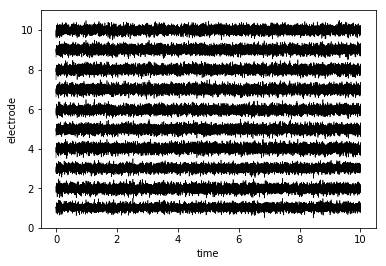

In [13]:
bo.plot_data()
plt.show()

/Library/Python/2.7/site-packages/nilearn/plotting/displays.py:1259: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


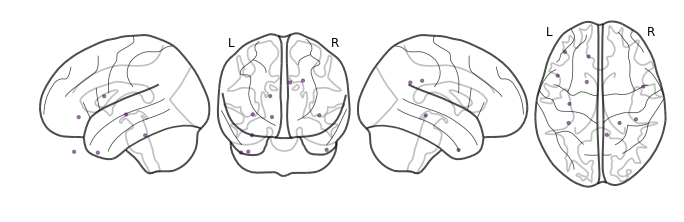

In [14]:
bo.plot_locs()

The other pieces of the brain object are listed below:

In [15]:
# array of session identifiers for each timepoint
sessions = bo.sessions

# number of sessions
n_sessions = bo.n_sessions

# sample rate
sample_rate = bo.sample_rate

# number of electrodes
n_elecs = bo.n_elecs

# length of each recording session in seconds
n_seconds = bo.n_secs

# the date and time that the bo was created
date_created = bo.date_created

# kurtosis of each electrode
kurtosis = bo.kurtosis

# meta data
meta = bo.meta

# label delinieating observed and reconstructed locations
label = bo.label

# Brain object methods

There are a few other useful methods on a brain object

## `bo.info()`

This method will give you a summary of the brain object:

In [16]:
bo.info()

Number of electrodes: 10
Recording time in seconds: [5 5]
Number of sessions: 2
Date created: Tue Jan 30 19:04:01 2018
Meta data: {'Hospital': 'DHMC', 'subjectID': '123', 'Investigator': 'Andy'}


## `bo.get_data()`

In [17]:
data_array = bo.get_data()

## `bo.get_zscore_data()`

This method will return a numpy array of the zscored data:

In [18]:
zdata_array = bo.get_zscore_data()

## `bo.get_locs()`

This method will return a numpy array of the electrode locations:

In [19]:
locs = bo.get_locs()

## `bo.plot_data()`

This method normalizes and plots data from brain object:

In [20]:
bo.plot_data()

## `bo.plot_locs()`
This method plots electrode locations from brain object:

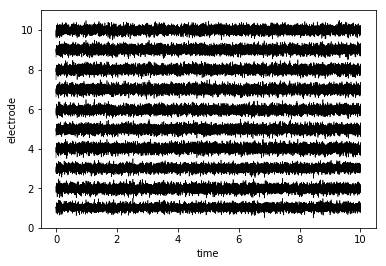

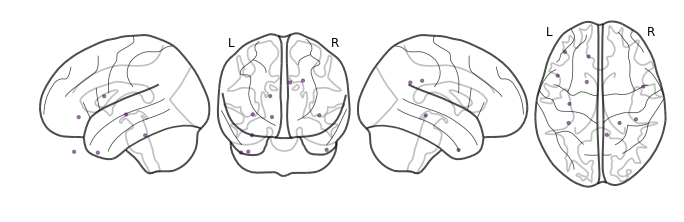

In [21]:
bo.plot_locs()

## `bo.save(fname='something')`

This method will save the brain object to the specified file location.
The data will be saved as a 'bo' file, which is a dictionary containing the elements of a brain object saved in the hd5 format using `deepdish`.

In [22]:
#bo.save(fname='brain_object')

## `bo.to_nii()`

This method converts the brain object into a `nibabel` nifti image.  If `filepath` is specified, the nifti file will be saved. You can also specify a nifti template with the `template` argument.

In [23]:
nii = bo.to_nii()
print(type(nii))

# save the file
# nii = bo.to_nii(filepath='/path/to/file/brain')

# specify a template
# nii = bo.to_nii(template='/path/to/nifti/file.nii')

<class 'nibabel.nifti1.Nifti1Image'>


/Users/lucyowen/repos/superEEG/superEEG/brain.py:401: RuntimeWarning: invalid value encountered in divide
  data = np.divide(data, counts)
